In [ ]:
!pip install yfinance
!pip install nltk
!pip install vaderSentiment
!pip install requests

In [ ]:
#Collect Stock Data
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

# Specify the start and end dates
start_date = "2025-02-05"
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect Nvidia stock data from the specified date range
nvidia_stock = yf.Ticker("NVDA")
stock_data = nvidia_stock.history(start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,121.760002,125.000000,120.760002,124.830002,262230800,0.0,0.0
1,2025-02-06 00:00:00-05:00,127.419998,128.770004,125.209999,128.679993,251483600,0.0,0.0
2,2025-02-07 00:00:00-05:00,129.220001,130.369995,125.000000,129.839996,228186300,0.0,0.0
3,2025-02-10 00:00:00-05:00,130.089996,135.000000,129.960007,133.570007,216989100,0.0,0.0
4,2025-02-11 00:00:00-05:00,132.580002,134.479996,131.020004,132.800003,178902400,0.0,0.0


In [ ]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,121.760002,125.000000,120.760002,124.830002,262230800,0.0,0.0
1,2025-02-06 00:00:00-05:00,127.419998,128.770004,125.209999,128.679993,251483600,0.0,0.0
2,2025-02-07 00:00:00-05:00,129.220001,130.369995,125.000000,129.839996,228186300,0.0,0.0
3,2025-02-10 00:00:00-05:00,130.089996,135.000000,129.960007,133.570007,216989100,0.0,0.0
4,2025-02-11 00:00:00-05:00,132.580002,134.479996,131.020004,132.800003,178902400,0.0,0.0
5,2025-02-12 00:00:00-05:00,130.020004,132.240005,129.080002,131.139999,160278600,0.0,0.0
6,2025-02-13 00:00:00-05:00,131.559998,136.500000,131.169998,135.289993,197430000,0.0,0.0
7,2025-02-14 00:00:00-05:00,136.479996,139.250000,135.500000,138.850006,195479600,0.0,0.0
8,2025-02-18 00:00:00-05:00,141.270004,143.440002,137.929993,139.399994,219176600,0.0,0.0
9,2025-02-19 00:00:00-05:00,139.509995,141.360001,137.220001,139.229996,167536000,0.0,0.0


In [ ]:
api_key = '#YOURAPIKEY'


url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Nvidia',
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Get articles from the last 30 days
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,  # Maximum number of results per page
    'language': 'en'
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data['message']}")

# Extract articles
articles = data['articles']

# Convert to DataFrame
news_data = pd.DataFrame(articles)
news_data = news_data[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']

In [ ]:
news_data

,date,headline
0,2025-02-19T13:57:42Z,Nvidia GeForce RTX 5070 Ti review: a cheaper R...
1,2025-02-19T21:24:22Z,Volvo’s ES90 sedan will be built with a Nvidia...
2,2025-02-10T17:54:29Z,Here’s How One OEM Is Fighting Against Nvidia ...
3,2025-02-26T01:06:27Z,Razer’s new Blade 18 offers Nvidia RTX 50-seri...
4,2025-02-28T19:10:53Z,Singapore Scheme May Have Funneled Nvidia Chip...
...,...,...
86,2025-02-10T23:03:34Z,OpenAI expects to have its first custom AI chi...
87,2025-02-14T16:09:55Z,Microsoft's 'Avowed' advanced access inexplica...
88,2025-02-21T16:13:28Z,NVIDIA dropping PhysX support isn't that big o...
89,2025-02-07T14:44:04Z,"The RTX 5080 is here, but you should probably ..."


In [ ]:
# Preprocess news headlines
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

news_data['cleaned_headline'] = news_data['headline'].apply(preprocess_text)

# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
news_data

,date,headline,cleaned_headline,sentiment_score
0,2025-02-19,Nvidia GeForce RTX 5070 Ti review: a cheaper R...,Nvidia GeForce RTX Ti review cheaper RTX,0.0000
1,2025-02-19,Volvo’s ES90 sedan will be built with a Nvidia...,Volvo sedan built Nvidia supercomputer,0.0000
2,2025-02-10,Here’s How One OEM Is Fighting Against Nvidia ...,One OEM Fighting Nvidia RTX Scalpers,-0.3612
3,2025-02-26,Razer’s new Blade 18 offers Nvidia RTX 50-seri...,Razer new Blade offers Nvidia RTX GPUs dual mo...,0.0000
4,2025-02-28,Singapore Scheme May Have Funneled Nvidia Chip...,Singapore Scheme May Funneled Nvidia Chips Dee...,0.0258
...,...,...,...,...
86,2025-02-10,OpenAI expects to have its first custom AI chi...,OpenAI expects first custom AI chip end year,0.0000
87,2025-02-14,Microsoft's 'Avowed' advanced access inexplica...,Microsoft advanced access inexplicably skips X...,0.5719
88,2025-02-21,NVIDIA dropping PhysX support isn't that big o...,NVIDIA dropping PhysX support big deal affecte...,-0.3400
89,2025-02-07,"The RTX 5080 is here, but you should probably ...",RTX probably buy RTX Super gaming PC instead,0.5994


from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

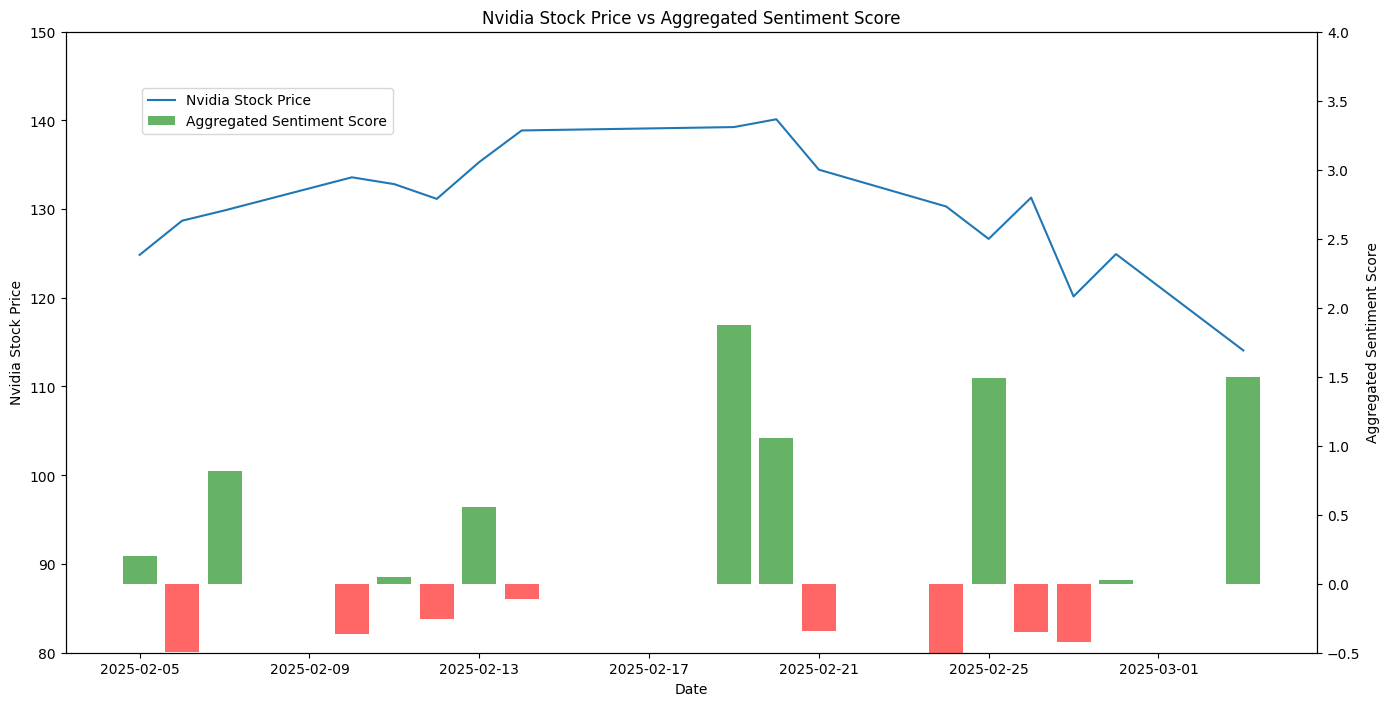

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with a secondary y-axis and bar plot for aggregated sentiment scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Nvidia Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='Nvidia Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(80, 150)  # Set the left y-axis range

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(-0.5, 4)  # Set the right y-axis range

fig.tight_layout()
plt.title('Nvidia Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()